In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
import plotly.io as pio
pio.renderers.default ='notebook'

In [3]:
pwd

'C:\\Users\\gkais\\Documents\\National University\\Masters_Data_Science\\ANA500'

In [4]:
# Load CSV files with low_memory=False
credits_df = pd.read_csv('C:\\Users\\gkais\\Documents\\National University\\Masters_Data_Science\\ANA500\\credits.csv', low_memory=False)
keywords_df = pd.read_csv('C:\\Users\\gkais\\Documents\\National University\\Masters_Data_Science\\ANA500\\keywords.csv', low_memory=False)
links_df = pd.read_csv('C:\\Users\\gkais\\Documents\\National University\\Masters_Data_Science\\ANA500\\links.csv', low_memory=False)
movies_metadata_df = pd.read_csv('C:\\Users\\gkais\\Documents\\National University\\Masters_Data_Science\\ANA500\\movies_metadata.csv', low_memory=False)
ratings_df = pd.read_csv('C:\\Users\\gkais\\Documents\\National University\\Masters_Data_Science\\ANA500\\ratings.csv', low_memory=False)

In [5]:
credits_df.head()


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [6]:
keywords_df.head()


,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [7]:
links_df.head()


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [8]:
movies_metadata_df.head()


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [9]:
ratings_df.head()


,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [10]:
#Merge keywords df and credits df using 'id' as the joinning variable

crd_keyword_merged = pd.merge(credits_df, keywords_df, on= 'id', how= 'outer', suffixes=('','_key'))
                         
redundant_columns = [col for col in crd_keyword_merged.columns if col.endswith('_key')]

crd_keyword_merged = crd_keyword_merged.drop(columns=redundant_columns)

In [11]:
crd_keyword_merged.head()

,cast,crew,id,keywords
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [12]:
#The merging variable id is different for the 2 dataframes
print(movies_metadata_df['id'].dtype)
print(crd_keyword_merged['id'].dtype)

object
int64


In [13]:
movies_metadata_df['id'] = pd.to_numeric(movies_metadata_df['id'], errors='coerce')

In [14]:
# Drop any NaNs that might have resulted from conversion errors
movies_metadata_df.dropna(subset=['id'], inplace=True)

In [15]:
#Concat movies_metadata_df to a int type so the dataframes can be merged
movies_metadata_df['id'] = movies_metadata_df['id'].astype(int)

In [16]:
#Merge credits/keywords df and movie_meta df using 'id' as the joinning variable

meta_crd_keyword_merged = pd.merge(movies_metadata_df, crd_keyword_merged, on= 'id', how= 'outer', suffixes=('','_merge'))
                         
redundant_columns = [col for col in meta_crd_keyword_merged.columns if col.endswith('_merge')]

meta_crd_keyword_merged = meta_crd_keyword_merged.drop(columns=redundant_columns)

In [17]:
meta_crd_keyword_merged.head() 

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [18]:
meta_crd_keyword_merged.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'cast', 'crew', 'keywords'],
      dtype='object')

In [19]:
# Merge meta_crd_keyword_links_merged with links on 'id'
meta_crd_keyword_links_merged = pd.merge(meta_crd_keyword_merged, links_df, left_on='id', right_on='movieId', how='left', suffixes=('','_link'))

redundant_columns = [col for col in meta_crd_keyword_links_merged.columns if col.endswith('_link')]

meta_crd_keyword_links_merged = meta_crd_keyword_links_merged.drop(columns=redundant_columns)


In [20]:
meta_crd_keyword_links_merged.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,title,video,vote_average,vote_count,cast,crew,keywords,movieId,imdbId,tmdbId
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",862.0,116985.0,88224.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1...",8844.0,78763.0,42164.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",NaN,NaN,NaN
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...",NaN,NaN,NaN
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...",NaN,NaN,NaN


In [21]:
# Ensure that movieId and tmdbId are of the same type
ratings_df['movieId'] = pd.to_numeric(ratings_df['movieId'], errors='coerce')
ratings_df.dropna(subset=['movieId'], inplace=True)
ratings_df['movieId'] = ratings_df['movieId'].astype(int)

In [22]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [23]:
# Now perform the merge
final_combined_df = pd.merge(meta_crd_keyword_links_merged, ratings_df, left_on='id', right_on='movieId', how='left')

In [24]:
final_combined_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,cast,crew,keywords,movieId_x,imdbId,tmdbId,userId,movieId_y,rating,timestamp
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",862.0,116985.0,88224.0,1923.0,862.0,3.0,858335006.0
1,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",862.0,116985.0,88224.0,2103.0,862.0,5.0,946044912.0
2,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",862.0,116985.0,88224.0,5380.0,862.0,1.0,878941641.0
3,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",862.0,116985.0,88224.0,6177.0,862.0,4.0,859415226.0
4,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",862.0,116985.0,88224.0,6525.0,862.0,4.0,857388995.0


In [25]:
#Remove duplicate row
del final_combined_df['movieId_x']

In [26]:
#Remove duplicate row
del final_combined_df['movieId_y']

In [27]:
print(type(final_combined_df['genres']))


<class 'pandas.core.series.Series'>


In [28]:
#Extract the genre tags from the series data

import ast 

final_combined_df['genres'] = final_combined_df['genres'].apply(ast.literal_eval)
final_combined_df['genre'] = final_combined_df['genres'].apply(lambda x: ' '.join([genre['name'] for genre in x]))

In [29]:
#Extract the production companies from the series data
final_combined_df['production_companies'] = final_combined_df['production_companies'].fillna('[]')

final_combined_df['production_companies'] = final_combined_df['production_companies'].apply(ast.literal_eval)

final_combined_df['production_company'] = final_combined_df['production_companies'].apply(lambda x: ' '.join([production_company['name'] for production_company in x]))

In [30]:
#Extract the production countries from the series data

final_combined_df['production_countries'] = final_combined_df['production_countries'].fillna('[]')

final_combined_df['production_countries'] = final_combined_df['production_countries'].apply(ast.literal_eval)

final_combined_df['production_country'] = final_combined_df['production_countries'].apply(lambda x: ' '.join([production_country['name'] for production_country in x]))

In [31]:
final_df = final_combined_df

In [32]:
final_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,crew,keywords,imdbId,tmdbId,userId,rating,timestamp,genre,production_company,production_country
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",116985.0,88224.0,1923.0,3.0,858335006.0,Animation Comedy Family,Pixar Animation Studios,United States of America
1,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",116985.0,88224.0,2103.0,5.0,946044912.0,Animation Comedy Family,Pixar Animation Studios,United States of America
2,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",116985.0,88224.0,5380.0,1.0,878941641.0,Animation Comedy Family,Pixar Animation Studios,United States of America
3,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",116985.0,88224.0,6177.0,4.0,859415226.0,Animation Comedy Family,Pixar Animation Studios,United States of America
4,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",116985.0,88224.0,6525.0,4.0,857388995.0,Animation Comedy Family,Pixar Animation Studios,United States of America


In [33]:
#Remove duplicate variables. and cast/crew since they contain infomation not being used in the analysis. 
del final_df['genres']
del final_df['production_companies']
del final_df['production_countries']
del final_df['cast']
del final_df['crew']
del final_df['keywords']
del final_df['overview']
del final_df['imdb_id']
del final_df['poster_path']
del final_df['tagline']
del final_df['tmdbId']
del final_df['spoken_languages']

In [34]:
final_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'homepage', 'id',
       'original_language', 'original_title', 'popularity', 'release_date',
       'revenue', 'runtime', 'status', 'title', 'video', 'vote_average',
       'vote_count', 'imdbId', 'userId', 'rating', 'timestamp', 'genre',
       'production_company', 'production_country'],
      dtype='object')

In [35]:
final_df.head()

,adult,belongs_to_collection,budget,homepage,id,original_language,original_title,popularity,release_date,revenue,...,video,vote_average,vote_count,imdbId,userId,rating,timestamp,genre,production_company,production_country
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,en,Toy Story,21.946943,1995-10-30,373554033.0,...,False,7.7,5415.0,116985.0,1923.0,3.0,858335006.0,Animation Comedy Family,Pixar Animation Studios,United States of America
1,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,en,Toy Story,21.946943,1995-10-30,373554033.0,...,False,7.7,5415.0,116985.0,2103.0,5.0,946044912.0,Animation Comedy Family,Pixar Animation Studios,United States of America
2,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,en,Toy Story,21.946943,1995-10-30,373554033.0,...,False,7.7,5415.0,116985.0,5380.0,1.0,878941641.0,Animation Comedy Family,Pixar Animation Studios,United States of America
3,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,en,Toy Story,21.946943,1995-10-30,373554033.0,...,False,7.7,5415.0,116985.0,6177.0,4.0,859415226.0,Animation Comedy Family,Pixar Animation Studios,United States of America
4,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,en,Toy Story,21.946943,1995-10-30,373554033.0,...,False,7.7,5415.0,116985.0,6525.0,4.0,857388995.0,Animation Comedy Family,Pixar Animation Studios,United States of America


In [36]:
final_df.isnull().sum()

adult                          0
belongs_to_collection    8758519
budget                         0
homepage                 8740226
id                             0
original_language             22
original_title                 0
popularity                     4
release_date                7113
revenue                        4
runtime                     1288
status                       941
title                          4
video                          4
vote_average                   4
vote_count                     4
imdbId                     38862
userId                     38932
rating                     38932
timestamp                  38932
genre                          0
production_company             0
production_country             0
dtype: int64

In [37]:
#Create a binary variable for the 'belongs to collection' variable. 0 = false, 1 = true
final_df['belongs_to_collection_binary'] = final_df['belongs_to_collection'].notnull().astype(int)

final_df = final_df.drop(columns=['belongs_to_collection'])

In [38]:
#Create a binary variable for the 'homepage' variable. 0 = false, 1 = true
final_df['homepage_binary'] = final_df['homepage'].notnull().astype(int)

final_df = final_df.drop(columns=['homepage'])

In [39]:
#Remove data that does not contain a rating since this is our primary outcome variable
final_df = final_df.dropna(subset=['rating'])

In [40]:
#View the unique values of the status variable

unique_values = final_df['status'].unique()
print(unique_values)

['Released' 'Rumored' nan 'In Production' 'Post Production']


In [41]:
#Remove the 866 cases that do not have a status listed. Status is a useful categorical variable to analyse the movies' user rating, and would create bias if put in an imputted category.
final_df = final_df.dropna(subset=['status'])

In [42]:
#Convert release date variable to a date field
final_df['release_date'] = pd.to_datetime(final_df['release_date'], errors='coerce')

In [43]:
#Imputate the missing values of runtime and release date. Runtime represents the length of the film so imputting the average length of all the films would fill the missing values and keep the integrity of the data. 
#Release date is a little more difficult. I used the mean as well to keep the release date balanced since it covers a wide range of dates.
final_df = final_df.fillna({
    'runtime': final_df['runtime'].mean(),
    'release_date': final_df['release_date'].mean(),
    'original_language': final_df['original_language'].mode()[0]
    })

In [44]:
final_df.isnull().sum()

adult                           0
budget                          0
id                              0
original_language               0
original_title                  0
popularity                      0
release_date                    0
revenue                         0
runtime                         0
status                          0
title                           0
video                           0
vote_average                    0
vote_count                      0
imdbId                          0
userId                          0
rating                          0
timestamp                       0
genre                           0
production_company              0
production_country              0
belongs_to_collection_binary    0
homepage_binary                 0
dtype: int64

In [45]:
final_df.head()

,adult,budget,id,original_language,original_title,popularity,release_date,revenue,runtime,status,...,vote_count,imdbId,userId,rating,timestamp,genre,production_company,production_country,belongs_to_collection_binary,homepage_binary
0,False,30000000,862,en,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Released,...,5415.0,116985.0,1923.0,3.0,858335006.0,Animation Comedy Family,Pixar Animation Studios,United States of America,1,1
1,False,30000000,862,en,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Released,...,5415.0,116985.0,2103.0,5.0,946044912.0,Animation Comedy Family,Pixar Animation Studios,United States of America,1,1
2,False,30000000,862,en,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Released,...,5415.0,116985.0,5380.0,1.0,878941641.0,Animation Comedy Family,Pixar Animation Studios,United States of America,1,1
3,False,30000000,862,en,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Released,...,5415.0,116985.0,6177.0,4.0,859415226.0,Animation Comedy Family,Pixar Animation Studios,United States of America,1,1
4,False,30000000,862,en,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Released,...,5415.0,116985.0,6525.0,4.0,857388995.0,Animation Comedy Family,Pixar Animation Studios,United States of America,1,1


In [46]:
final_df.columns

Index(['adult', 'budget', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'revenue', 'runtime', 'status', 'title',
       'video', 'vote_average', 'vote_count', 'imdbId', 'userId', 'rating',
       'timestamp', 'genre', 'production_company', 'production_country',
       'belongs_to_collection_binary', 'homepage_binary'],
      dtype='object')

In [47]:
copy_df = final_df

In [48]:
 final_df = copy_df

In [49]:
final_df['genre'] = final_df['genre'].str.split()

In [50]:
final_df.head()

,adult,budget,id,original_language,original_title,popularity,release_date,revenue,runtime,status,...,vote_count,imdbId,userId,rating,timestamp,genre,production_company,production_country,belongs_to_collection_binary,homepage_binary
0,False,30000000,862,en,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Released,...,5415.0,116985.0,1923.0,3.0,858335006.0,"[Animation, Comedy, Family]",Pixar Animation Studios,United States of America,1,1
1,False,30000000,862,en,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Released,...,5415.0,116985.0,2103.0,5.0,946044912.0,"[Animation, Comedy, Family]",Pixar Animation Studios,United States of America,1,1
2,False,30000000,862,en,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Released,...,5415.0,116985.0,5380.0,1.0,878941641.0,"[Animation, Comedy, Family]",Pixar Animation Studios,United States of America,1,1
3,False,30000000,862,en,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Released,...,5415.0,116985.0,6177.0,4.0,859415226.0,"[Animation, Comedy, Family]",Pixar Animation Studios,United States of America,1,1
4,False,30000000,862,en,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Released,...,5415.0,116985.0,6525.0,4.0,857388995.0,"[Animation, Comedy, Family]",Pixar Animation Studios,United States of America,1,1


In [51]:
# Get unique genres
unique_genres = set([genre for sublist in final_df['genre'] for genre in sublist])

In [52]:
# Create binary columns for each genre
for genre in unique_genres:
    final_df[genre] = final_df['genre'].apply(lambda x: 1 if genre in x else 0)

In [53]:
del final_df['genre']
del final_df['original_title']

In [54]:
final_df.columns

Index(['adult', 'budget', 'id', 'original_language', 'popularity',
       'release_date', 'revenue', 'runtime', 'status', 'title', 'video',
       'vote_average', 'vote_count', 'imdbId', 'userId', 'rating', 'timestamp',
       'production_company', 'production_country',
       'belongs_to_collection_binary', 'homepage_binary', 'Romance', 'TV',
       'Science', 'War', 'History', 'Adventure', 'Fantasy', 'Music', 'Foreign',
       'Horror', 'Action', 'Family', 'Fiction', 'Thriller', 'Comedy', 'Crime',
       'Movie', 'Documentary', 'Animation', 'Western', 'Drama', 'Mystery'],
      dtype='object')

In [55]:
#Obtain dummy variables for the different categories of status
final_df = pd.get_dummies(final_df, columns=['status'])

In [56]:
#View all columns using head()
pd.set_option('display.max_columns', None)

In [57]:
final_df.head()

,adult,budget,id,original_language,popularity,release_date,revenue,runtime,title,video,vote_average,vote_count,imdbId,userId,rating,timestamp,production_company,production_country,belongs_to_collection_binary,homepage_binary,Romance,TV,Science,War,History,Adventure,Fantasy,Music,Foreign,Horror,Action,Family,Fiction,Thriller,Comedy,Crime,Movie,Documentary,Animation,Western,Drama,Mystery,status_In Production,status_Post Production,status_Released,status_Rumored
0,False,30000000,862,en,21.946943,1995-10-30,373554033.0,81.0,Toy Story,False,7.7,5415.0,116985.0,1923.0,3.0,858335006.0,Pixar Animation Studios,United States of America,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,False,False,True,False
1,False,30000000,862,en,21.946943,1995-10-30,373554033.0,81.0,Toy Story,False,7.7,5415.0,116985.0,2103.0,5.0,946044912.0,Pixar Animation Studios,United States of America,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,False,False,True,False
2,False,30000000,862,en,21.946943,1995-10-30,373554033.0,81.0,Toy Story,False,7.7,5415.0,116985.0,5380.0,1.0,878941641.0,Pixar Animation Studios,United States of America,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,False,False,True,False
3,False,30000000,862,en,21.946943,1995-10-30,373554033.0,81.0,Toy Story,False,7.7,5415.0,116985.0,6177.0,4.0,859415226.0,Pixar Animation Studios,United States of America,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,False,False,True,False
4,False,30000000,862,en,21.946943,1995-10-30,373554033.0,81.0,Toy Story,False,7.7,5415.0,116985.0,6525.0,4.0,857388995.0,Pixar Animation Studios,United States of America,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,False,False,True,False


In [58]:
final_df.shape

(11449050, 46)

In [59]:
# Convert 'budget' column to numeric data type
final_df['budget'] = pd.to_numeric(final_df['budget'], errors='coerce')

In [60]:
# Save the current float formatting
current_float_format = pd.options.display.float_format

# Set custom float formatting function
pd.options.display.float_format = '{:.2f}'.format

In [61]:
# Calculate the mean rating for each movie
mean_ratings = final_df.groupby('id')['rating'].mean().reset_index()
mean_ratings.rename(columns={'rating': 'mean_rating'}, inplace=True)

# Drop duplicate rows based on the movie identifier, keeping only necessary columns
movies_df = final_df.drop_duplicates(subset='id').drop(columns=['userId', 'rating', 'timestamp'])

# Merge the mean ratings with the movies DataFrame
merged_df = movies_df.merge(mean_ratings, on='id')

merged_df.head()

,adult,budget,id,original_language,popularity,release_date,revenue,runtime,title,video,vote_average,vote_count,imdbId,production_company,production_country,belongs_to_collection_binary,homepage_binary,Romance,TV,Science,War,History,Adventure,Fantasy,Music,Foreign,Horror,Action,Family,Fiction,Thriller,Comedy,Crime,Movie,Documentary,Animation,Western,Drama,Mystery,status_In Production,status_Post Production,status_Released,status_Rumored,mean_rating
0,False,30000000,862,en,21.946943,1995-10-30,373554033.00,81.00,Toy Story,False,7.70,5415.00,116985.00,Pixar Animation Studios,United States of America,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,False,False,True,False,3.60
1,False,65000000,8844,en,17.015539,1995-12-15,262797249.00,104.00,Jumanji,False,6.90,2413.00,78763.00,TriStar Pictures Teitler Film Interscope Commu...,United States of America,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,False,False,True,False,3.76
2,False,60000000,949,en,17.924927,1995-12-15,187436818.00,170.00,Heat,False,7.70,1886.00,48028.00,Regency Enterprises Forward Pass Warner Bros.,United States of America,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,False,False,True,False,3.91
3,False,58000000,710,en,14.686036,1995-11-16,352194034.00,130.00,GoldenEye,False,6.60,1194.00,115851.00,United Artists Eon Productions,United Kingdom United States of America,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,False,False,True,False,2.74
4,False,98000000,1408,en,7.284477,1995-12-22,10017322.00,119.00,Cutthroat Island,False,5.70,137.00,104691.00,Le Studio Canal+ Laurence Mark Productions Met...,France Germany Italy United States of America,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,False,False,True,False,3.71


In [62]:
# Select numerical variables from the DataFrame
numerical_vars = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count','mean_rating']

# DataFrame with the first entry of numerical variables
numerical_df = merged_df[numerical_vars]

# Calculate the correlation between numerical variables and the mean rating
correlation_matrix = numerical_df.corr()

# Print correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

Correlation matrix:
              budget  popularity  runtime  vote_average  vote_count  \
budget          1.00        0.55     0.21          0.10        0.64   
popularity      0.55        1.00     0.26          0.27        0.73   
runtime         0.21        0.26     1.00          0.20        0.19   
vote_average    0.10        0.27     0.20          1.00        0.19   
vote_count      0.64        0.73     0.19          0.19        1.00   
mean_rating     0.01        0.05     0.02          0.06        0.03   

              mean_rating  
budget               0.01  
popularity           0.05  
runtime              0.02  
vote_average         0.06  
vote_count           0.03  
mean_rating          1.00  


In [63]:
print("Descriptive stats for Rating Variable:")
merged_df['mean_rating'].describe()

Descriptive stats for Rating Variable:


count   7554.00
mean       3.13
std        0.62
min        0.50
25%        2.80
50%        3.23
75%        3.55
max        5.00
Name: mean_rating, dtype: float64

In [64]:
# Calculate descriptive statistics for the 'budget' column
budget_stats = merged_df['budget'].describe()

print("Budget statistics:")
print(budget_stats)

Budget statistics:
count        7554.00
mean      8138297.77
std      24737849.16
min             0.00
25%             0.00
50%             0.00
75%        850000.00
max     380000000.00
Name: budget, dtype: float64


In [65]:
#Descriptive stats for Numerical Variables
numeric_stats = numerical_df.describe()

print("Descriptive stats for Numerical Variables:")
print(numeric_stats)

Descriptive stats for Numerical Variables:
            budget  runtime  vote_average  vote_count  mean_rating
count      7554.00  7554.00       7554.00     7554.00      7554.00
mean    8138297.77    98.55          5.88      240.22         3.13
std    24737849.16    35.18          1.77      784.53         0.62
min           0.00     0.00          0.00        0.00         0.50
25%           0.00    88.00          5.30        4.00         2.80
50%           0.00    97.00          6.20       13.00         3.23
75%      850000.00   110.00          7.00       86.00         3.55
max   380000000.00   877.00         10.00    14075.00         5.00


In [66]:
genres = ['War','Mystery','Romance','Documentary','Foreign','Thriller','Adventure',
'Animation','Family','Drama','Music','Horror','Comedy','Fiction','Action',
'History','Movie','Western','TV','Crime','Fantasy','Science']

# Sum the values in each genre column to get the total number of movies in each genre
genre_counts = merged_df[genres].sum()

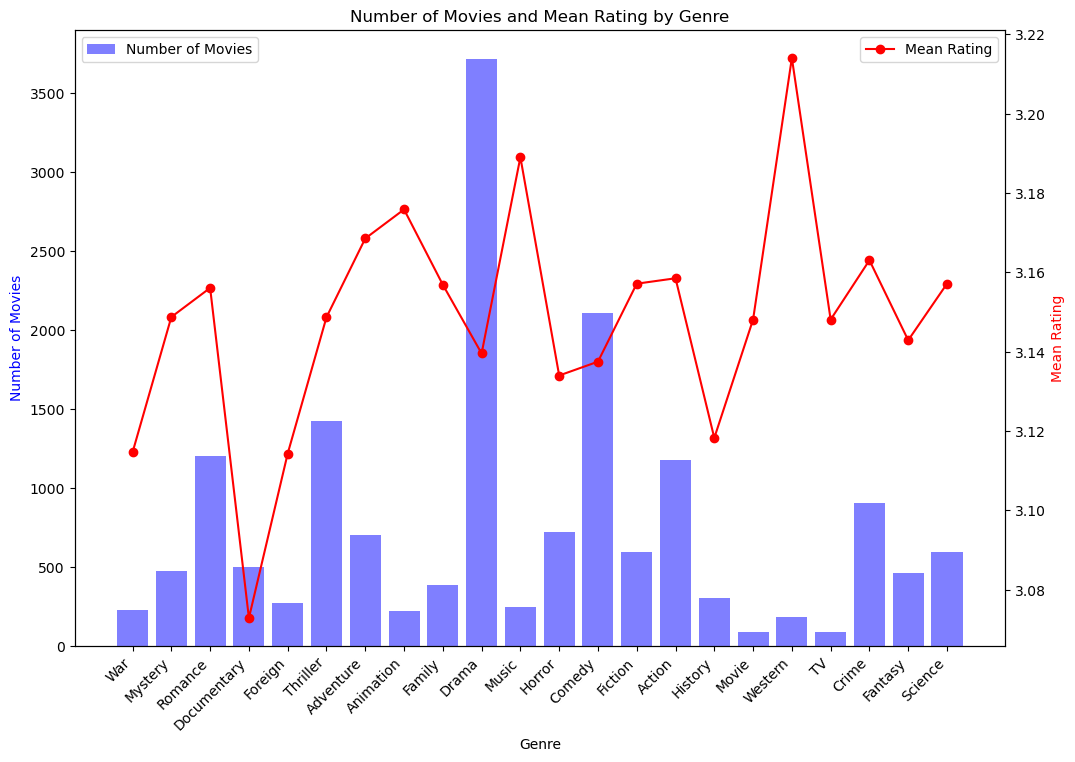

In [67]:
# Select only the relevant columns for genres and mean rating
genre_ratings = merged_df[genres + ['mean_rating']]

# Calculate the total number of movies in each genre
genre_counts = genre_ratings[genres].sum()

# Create a list of mean ratings corresponding to each genre
genre_mean_ratings = [genre_ratings[genre_ratings[genre] == 1]['mean_rating'].mean() for genre in genres]

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot bar chart for genre counts
ax1.bar(genres, genre_counts, color='b', alpha=0.5, label='Number of Movies')

# Create a second y-axis for mean ratings
ax2 = ax1.twinx()
ax2.plot(genres, genre_mean_ratings, color='r', marker='o', label='Mean Rating')

# Set labels and title
ax1.set_xlabel('Genre')
ax1.set_ylabel('Number of Movies', color='b')
ax2.set_ylabel('Mean Rating', color='r')

# Set x-tick labels
ax1.set_xticks(range(len(genres)))
ax1.set_xticklabels(genres, rotation=45, ha='right')

plt.title('Number of Movies and Mean Rating by Genre')

# Show legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

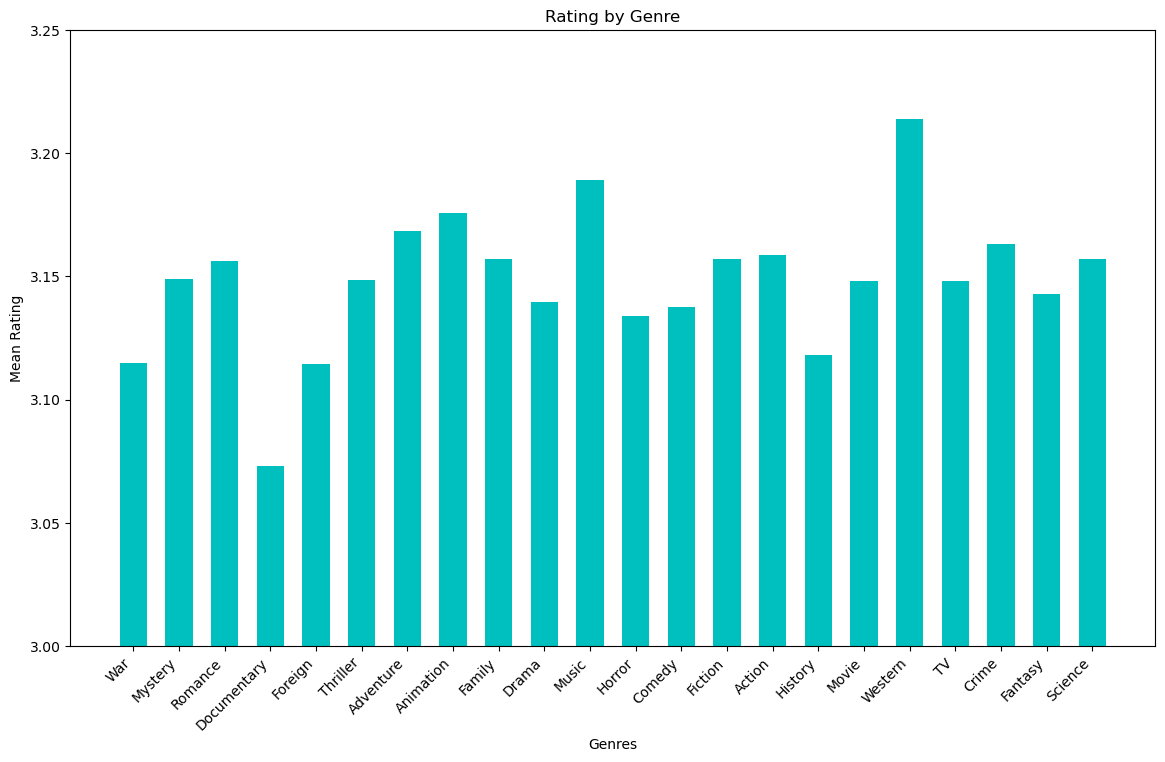

In [68]:
# Select only the relevant columns for genres and mean rating
genre_ratings = merged_df[genres + ['mean_rating']]

# Create a list of mean ratings corresponding to each genre
genre_mean_ratings = [genre_ratings[genre_ratings[genre] == 1]['mean_rating'].mean() for genre in genres]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot bar chart for mean ratings
bar_width = 0.6
index = np.arange(len(genres))
bar = ax.bar(index, genre_mean_ratings, bar_width, color='c', label='Mean Rating')

# Set labels and title
ax.set_xlabel('Genres')
ax.set_ylabel('Mean Rating')
ax.set_title('Rating by Genre')
ax.set_xticks(index)
ax.set_xticklabels(genres, rotation=45, ha='right')

# Zoom in on the y-axis
ax.set_ylim(3, 3.25)  # Adjust these limits based on the range of your mean ratings

# Show plot
plt.show()

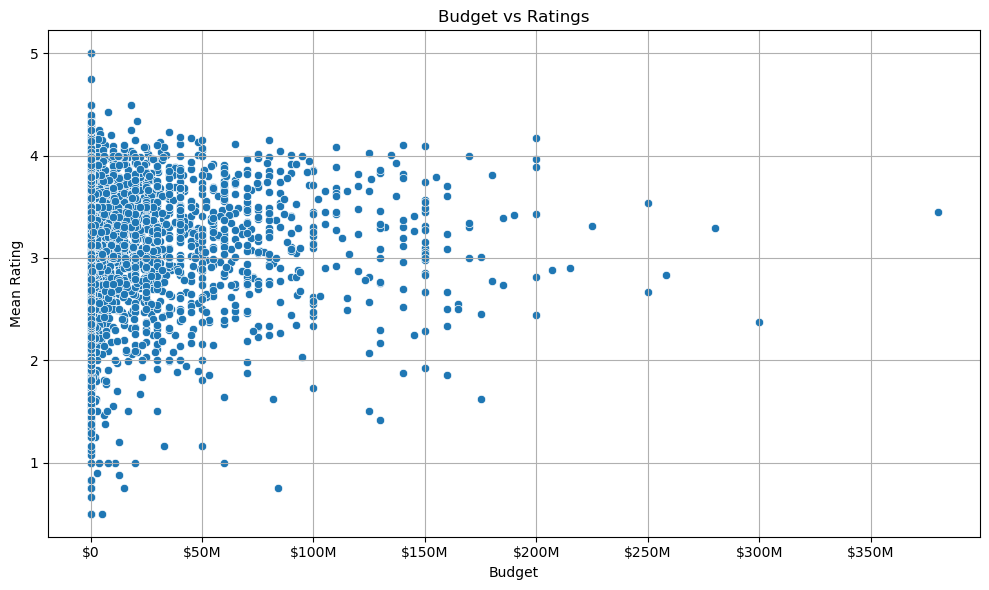

In [112]:
# Function to format budget in millions or billions
def format_budget(x, pos):
    if x >= 1e9:  # if budget is in billions
        return f'${x/1e9:.0f}B'
    elif x >= 1e6:  # if budget is in millions
        return f'${x/1e6:.0f}M'
    else:  # for other values, retain them as they are
        return f'${x:.0f}'

# Create a scatter plot of budget vs ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='budget', y='mean_rating')

# Apply the custom formatter to the x-axis
formatter = ticker.FuncFormatter(format_budget)
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('Budget vs Ratings')
plt.xlabel('Budget')
plt.ylabel('Mean Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

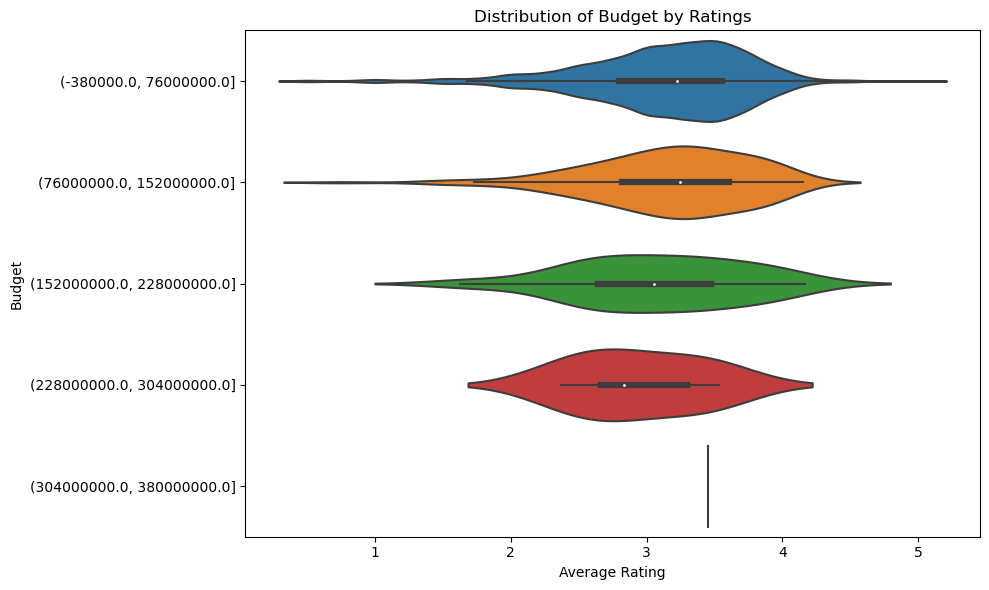

In [70]:
# Define the budget ranges
budget_ranges = pd.cut(merged_df['budget'], bins=5)  # Split budget into 5 equal-sized ranges

# Create a violin plot of ratings for each budget range
plt.figure(figsize=(10, 6))
sns.violinplot(x=merged_df['mean_rating'], y=budget_ranges)
plt.title('Distribution of Budget by Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Budget')
plt.tight_layout()
plt.show()

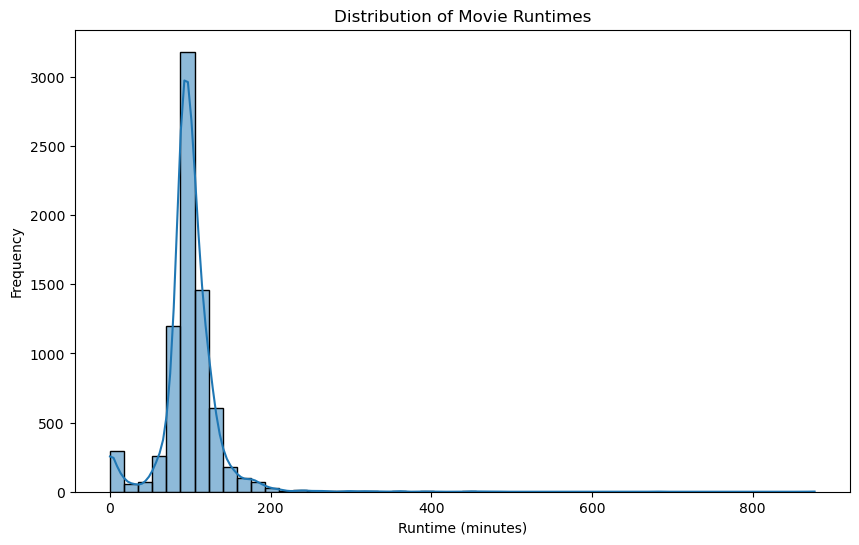

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['runtime'], bins=50, kde=True)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

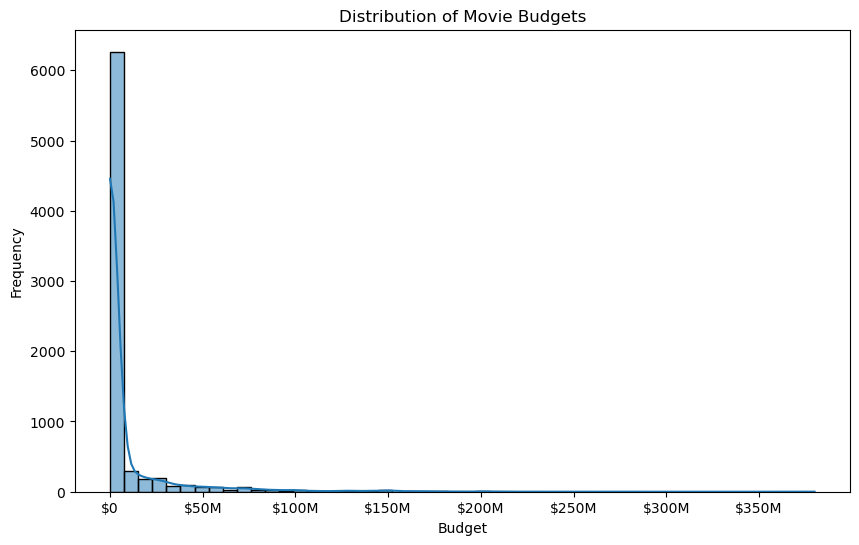

In [111]:
# Function to format revenue in millions or billions
def format_revenue(x, pos):
    if x >= 1e9:  # if revenue is in billions
        return f'${x/1e9:.0f}B'
    elif x >= 1e6:  # if revenue is in millions
        return f'${x/1e6:.0f}M'
    else:  # for other values, retain them as they are
        return f'${x:.0f}'

plt.figure(figsize=(10, 6))
sns.histplot(merged_df['budget'], bins=50, kde=True)
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget')
plt.ylabel('Frequency')

# Apply the custom formatter to the x-axis
formatter = ticker.FuncFormatter(format_revenue)
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()


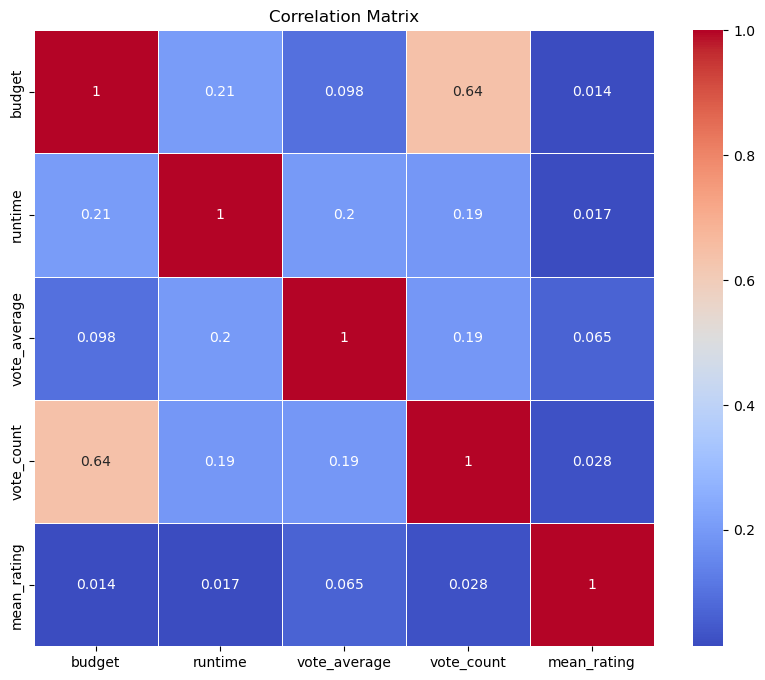

In [73]:
plt.figure(figsize=(10, 8))
corr_matrix = merged_df[['budget', 'runtime', 'vote_average', 'vote_count', 'mean_rating']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

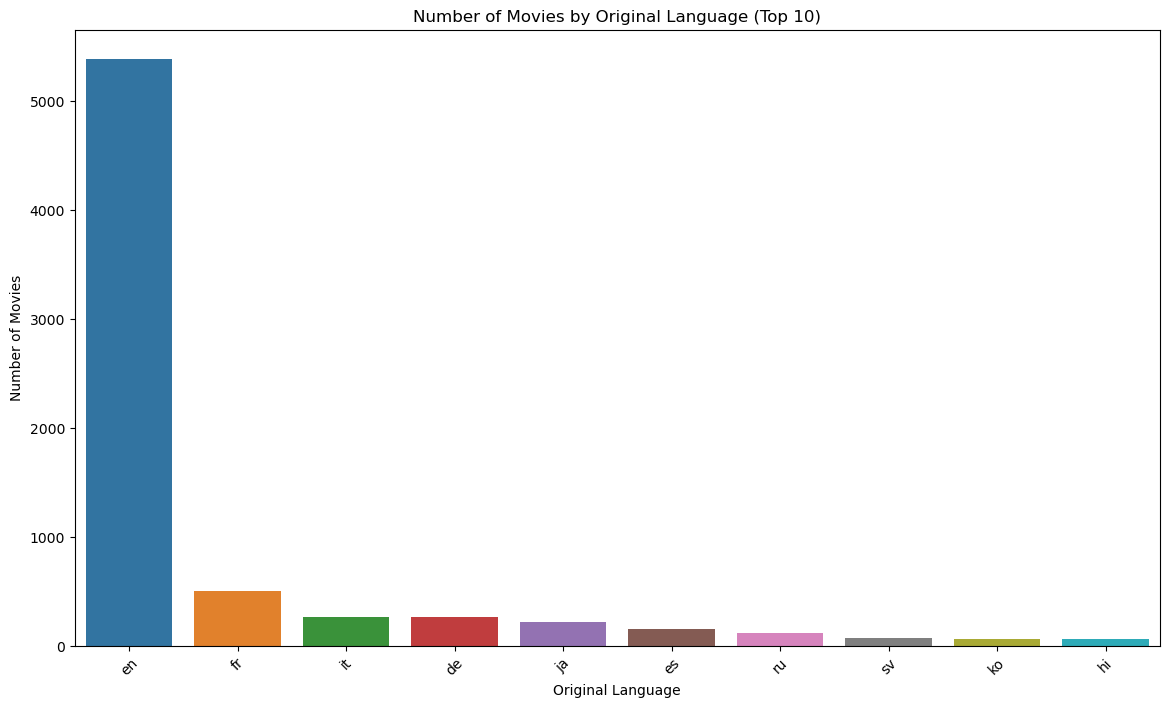

In [74]:
# Get the top 10 languages by movie count
top_10_languages = merged_df['original_language'].value_counts().nlargest(10)

# Plot the bar graph of movie count by 'Original Language' for the top 10 languages
plt.figure(figsize=(14, 8))
sns.barplot(x=top_10_languages.index, y=top_10_languages.values)
plt.title('Number of Movies by Original Language (Top 10)')
plt.xlabel('Original Language')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

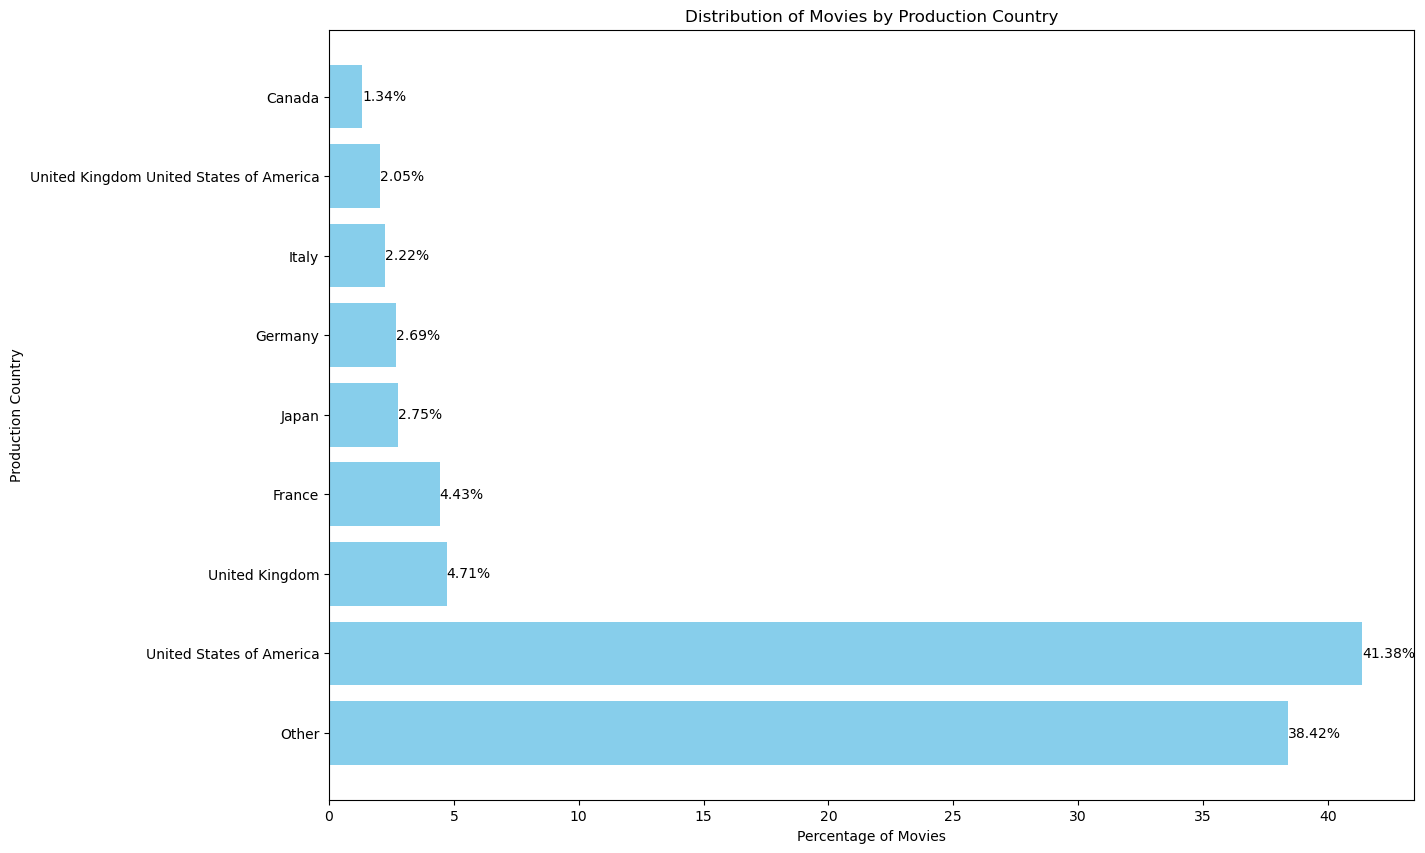

In [75]:
# Clean the data: Replace empty or whitespace-only entries with 'Other'
merged_df['production_country'] = merged_df['production_country'].apply(lambda x: 'Other' if pd.isna(x) or str(x).strip() == '' else x)

# Calculate the percentage of movies for each production country
country_counts = merged_df['production_country'].value_counts()
total_movies = country_counts.sum()
country_percentages = (country_counts / total_movies) * 100

# Group countries with less than 1.3% into 'Other'
threshold = 1.3
small_countries = country_percentages[country_percentages < threshold].index
merged_df['production_country'] = merged_df['production_country'].apply(
    lambda x: 'Other' if x in small_countries else x
)

# Recalculate the counts including 'Other'
country_counts = merged_df['production_country'].value_counts()
country_percentages = (country_counts / total_movies) * 100

# Create a new series with 'Other' as the only entry
other_series = pd.Series([country_percentages['Other']], index=['Other'])

# Concatenate the new series with the original series
country_percentages_with_other = pd.concat([other_series, country_percentages.drop('Other')])

# Horizontal bar plot
plt.figure(figsize=(14, 10))
bars = plt.barh(country_percentages_with_other.index, country_percentages_with_other.values, color='skyblue')

# Add labels to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}%', va='center')

plt.title('Distribution of Movies by Production Country')
plt.xlabel('Percentage of Movies')
plt.ylabel('Production Country')
plt.show()

In [76]:
country_counts

production_country
United States of America                   3126
Other                                      2902
United Kingdom                              356
France                                      335
Japan                                       208
Germany                                     203
Italy                                       168
United Kingdom United States of America     155
Canada                                      101
Name: count, dtype: int64

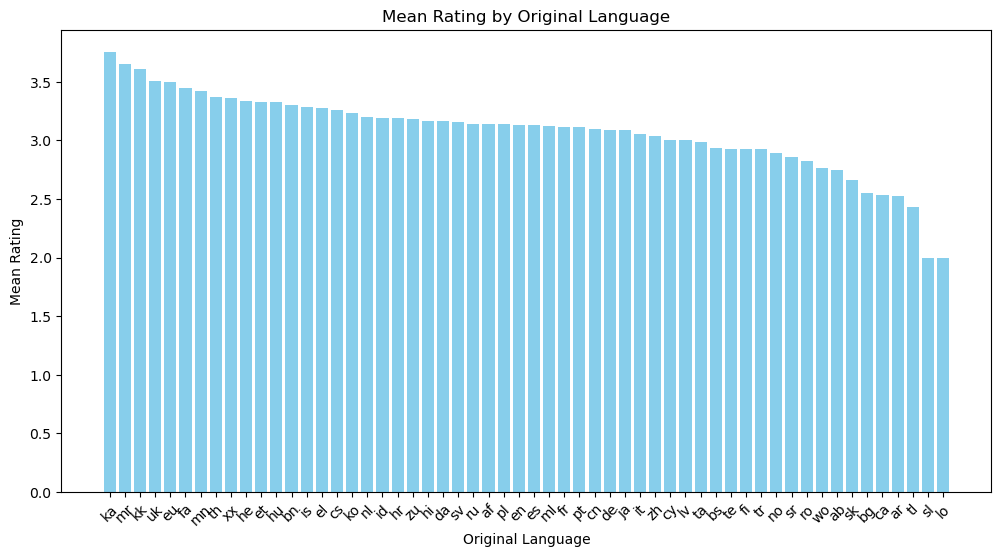

In [77]:
# Group the data by original language and calculate mean rating
mean_rating_by_language = merged_df.groupby('original_language')['mean_rating'].mean().reset_index()

# Sort the data by mean rating
mean_rating_by_language = mean_rating_by_language.sort_values(by='mean_rating', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(mean_rating_by_language['original_language'], mean_rating_by_language['mean_rating'], color='skyblue')
plt.xlabel('Original Language')
plt.ylabel('Mean Rating')
plt.title('Mean Rating by Original Language')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

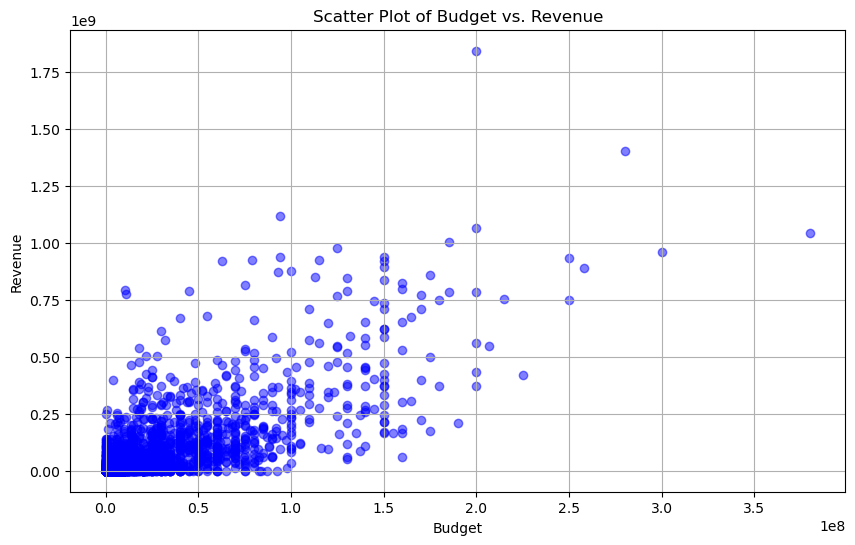

In [78]:
# Extract 'budget' and 'revenue' columns
budget = merged_df['budget']
revenue = merged_df['revenue']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(budget, revenue, color='blue', alpha=0.5)
plt.title('Scatter Plot of Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

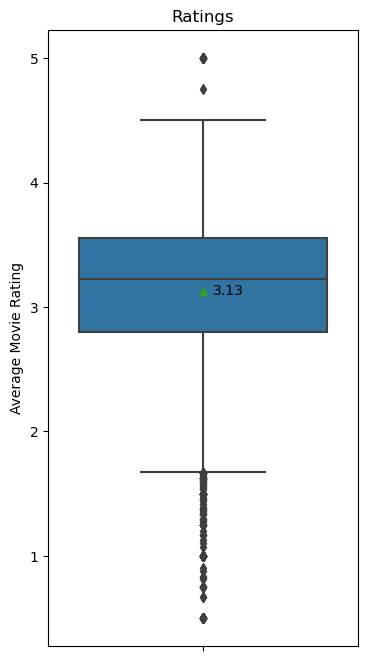

In [79]:
# Create a boxplot of ratings
plt.figure(figsize=(4, 8))
sns.boxplot(data=merged_df, y='mean_rating', showmeans=True, showfliers=True)
plt.title('Ratings')
plt.ylabel('Average Movie Rating')


# Display numerical values at the mean
means = merged_df['mean_rating'].mean()
plt.text(0.08, means, f'{means:.2f}', ha='center', va='center', color='black', fontsize=10)

plt.show()

In [80]:
merged_df.head()

,adult,budget,id,original_language,popularity,release_date,revenue,runtime,title,video,vote_average,vote_count,imdbId,production_company,production_country,belongs_to_collection_binary,homepage_binary,Romance,TV,Science,War,History,Adventure,Fantasy,Music,Foreign,Horror,Action,Family,Fiction,Thriller,Comedy,Crime,Movie,Documentary,Animation,Western,Drama,Mystery,status_In Production,status_Post Production,status_Released,status_Rumored,mean_rating
0,False,30000000,862,en,21.946943,1995-10-30,373554033.00,81.00,Toy Story,False,7.70,5415.00,116985.00,Pixar Animation Studios,United States of America,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,False,False,True,False,3.60
1,False,65000000,8844,en,17.015539,1995-12-15,262797249.00,104.00,Jumanji,False,6.90,2413.00,78763.00,TriStar Pictures Teitler Film Interscope Commu...,United States of America,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,False,False,True,False,3.76
2,False,60000000,949,en,17.924927,1995-12-15,187436818.00,170.00,Heat,False,7.70,1886.00,48028.00,Regency Enterprises Forward Pass Warner Bros.,United States of America,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,False,False,True,False,3.91
3,False,58000000,710,en,14.686036,1995-11-16,352194034.00,130.00,GoldenEye,False,6.60,1194.00,115851.00,United Artists Eon Productions,United Kingdom United States of America,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,False,False,True,False,2.74
4,False,98000000,1408,en,7.284477,1995-12-22,10017322.00,119.00,Cutthroat Island,False,5.70,137.00,104691.00,Le Studio Canal+ Laurence Mark Productions Met...,Other,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,False,False,True,False,3.71


In [81]:
merged_df['adult'].unique()

array(['False', 'True'], dtype=object)

In [82]:
merged_df['video'].unique()

array([False, True], dtype=object)

In [83]:
# Convert 'adult' column to boolean with custom mapping, handling NaN values
merged_df['adult'] = merged_df['adult'].map({'False': False, 'True': True})

# Convert 'video' column to boolean directly
merged_df['video'] = merged_df['video'].astype(bool)


# Convert boolean columns to integers
boolean_columns = merged_df.select_dtypes(include=['bool']).columns
merged_df[boolean_columns] = merged_df[boolean_columns].astype(int)

# Check unique values in 'adult' and 'video' columns
print(merged_df['adult'].unique())
print(merged_df['video'].unique())

[0 1]
[0 1]


In [84]:
merged_df.head()

,adult,budget,id,original_language,popularity,release_date,revenue,runtime,title,video,vote_average,vote_count,imdbId,production_company,production_country,belongs_to_collection_binary,homepage_binary,Romance,TV,Science,War,History,Adventure,Fantasy,Music,Foreign,Horror,Action,Family,Fiction,Thriller,Comedy,Crime,Movie,Documentary,Animation,Western,Drama,Mystery,status_In Production,status_Post Production,status_Released,status_Rumored,mean_rating
0,0,30000000,862,en,21.946943,1995-10-30,373554033.00,81.00,Toy Story,0,7.70,5415.00,116985.00,Pixar Animation Studios,United States of America,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,3.60
1,0,65000000,8844,en,17.015539,1995-12-15,262797249.00,104.00,Jumanji,0,6.90,2413.00,78763.00,TriStar Pictures Teitler Film Interscope Commu...,United States of America,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3.76
2,0,60000000,949,en,17.924927,1995-12-15,187436818.00,170.00,Heat,0,7.70,1886.00,48028.00,Regency Enterprises Forward Pass Warner Bros.,United States of America,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,3.91
3,0,58000000,710,en,14.686036,1995-11-16,352194034.00,130.00,GoldenEye,0,6.60,1194.00,115851.00,United Artists Eon Productions,United Kingdom United States of America,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2.74
4,0,98000000,1408,en,7.284477,1995-12-22,10017322.00,119.00,Cutthroat Island,0,5.70,137.00,104691.00,Le Studio Canal+ Laurence Mark Productions Met...,Other,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3.71


In [85]:
len(merged_df)

7554

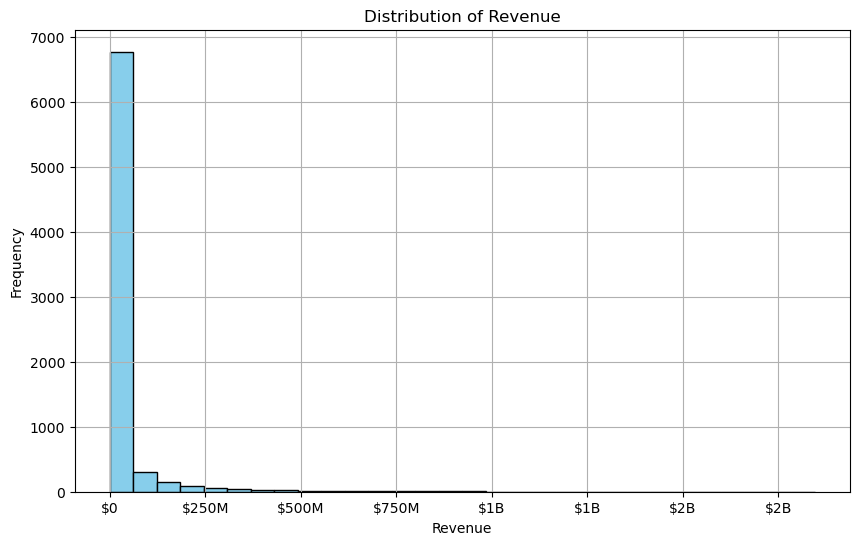

In [87]:
import matplotlib.ticker as ticker
# Function to format revenue in millions or billions
def format_revenue(x, pos):
    if x >= 1e9:  # if revenue is in billions
        return f'${x/1e9:.0f}B'
    elif x >= 1e6:  # if revenue is in millions
        return f'${x/1e6:.0f}M'
    else:  # for other values, retain them as they are
        return f'${x:.0f}'

# Plot revenue
plt.figure(figsize=(10, 6))
plt.hist(merged_df['revenue'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.grid(True)

# Apply the custom formatter to the x-axis
formatter = ticker.FuncFormatter(format_revenue)
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

In [88]:
# Feature Selection
genre_features = ['History', 'Fantasy', 'Mystery', 'Horror', 'War', 'Western', 
                  'Fiction', 'TV', 'Crime', 'Drama', 'Movie', 'Animation', 
                  'Action', 'Family', 'Documentary', 'Romance', 'Science', 
                  'Music', 'Adventure', 'Comedy', 'Foreign', 'Thriller']

In [89]:
# Select binary and categorical features
binary_features = ['belongs_to_collection_binary', 'homepage_binary',
                   'status_In Production', 'status_Post Production', 
                   'status_Released', 'status_Rumored', 'adult', 'video']

In [90]:
# Select numerical features
numerical_features = ['budget', 'runtime', 'revenue', 'popularity']

In [91]:
# Feature Selection
X = merged_df[numerical_features + binary_features + genre_features]
y = merged_df[ 'mean_rating']

In [92]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [94]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


y_pred_linear = linear_reg.predict(X_test)

In [95]:
# Evaluation
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f'Linear Regression MAE: {mae_linear}')
print(f'Linear Regression R^2: {r2_linear}')

Linear Regression MAE: 0.47194148712096473
Linear Regression R^2: -0.0009071635991413363


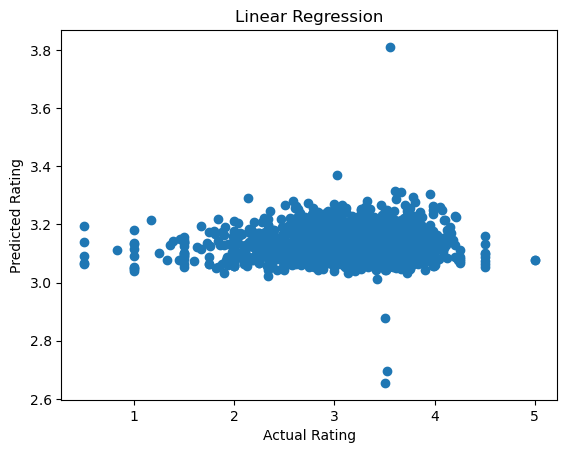

In [96]:
# Plot for Linear Regression
plt.scatter(y_test, y_pred_linear)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Linear Regression')
plt.show()

In [97]:
# SVM Regression
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

SVR()

In [98]:
# Predict on the test set
y_pred_svr = svr.predict(X_test)

In [99]:
# Evaluation
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f'SVM Regression MAE: {mae_svr}')
print(f'SVM Regression R^2: {r2_svr}')

SVM Regression MAE: 0.47470220354560677
SVM Regression R^2: -0.039631497786645875


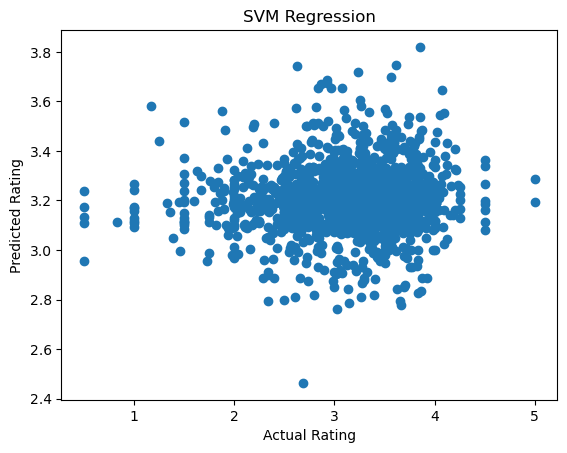

In [100]:
# Plot for SVM Regression

plt.scatter(y_test, y_pred_svr)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('SVM Regression')

plt.show()

In [101]:
# Round results to 3rd decimal
mae_linear = round(mae_linear, 3)
r2_linear = round(r2_linear, 3)

mae_svr = round(mae_svr, 3)
r2_linear = round(r2_linear, 3)

In [102]:
# Print values of linear and SVM

print(f'Linear Regression MAE: {mae_linear}')
print(f'Linear Regression R^2: {r2_linear}')
print(f'SVM Regression MAE: {mae_svr}')
print(f'SVM Regression R^2: {r2_svr}')

Linear Regression MAE: 0.472
Linear Regression R^2: -0.001
SVM Regression MAE: 0.475
SVM Regression R^2: -0.039631497786645875


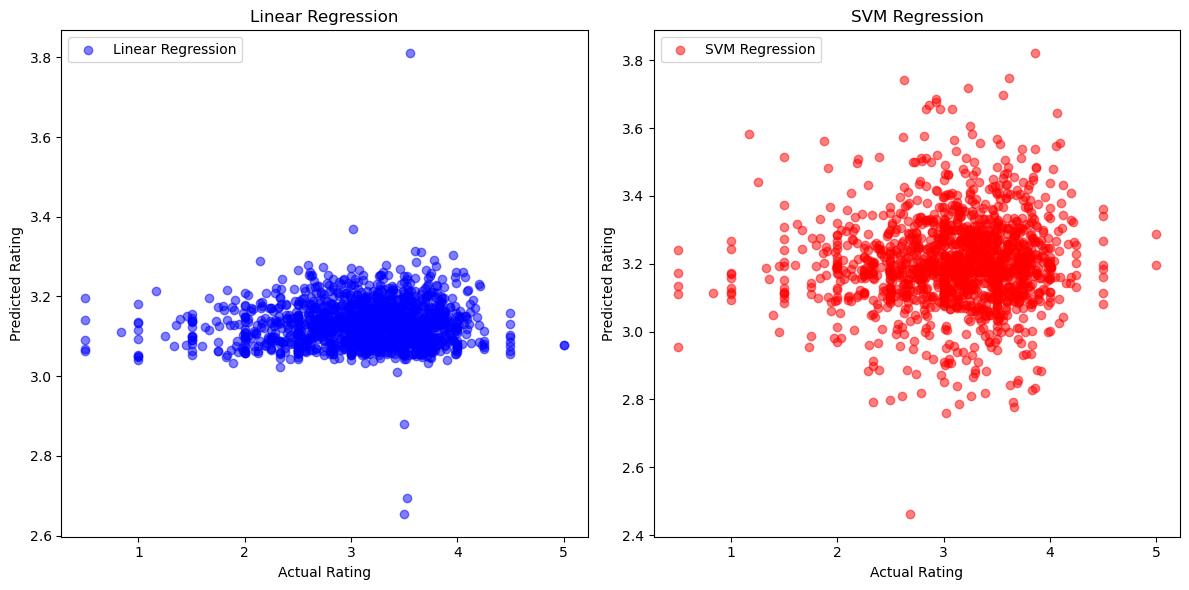

In [103]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Linear Regression
axs[0].scatter(y_test, y_pred_linear, alpha=0.5, label='Linear Regression', color='blue')
axs[0].set_xlabel('Actual Rating')
axs[0].set_ylabel('Predicted Rating')
axs[0].set_title('Linear Regression')
axs[0].legend()

# Plot for SVM Regression
axs[1].scatter(y_test, y_pred_svr, alpha=0.5, label='SVM Regression', color='red')
axs[1].set_xlabel('Actual Rating')
axs[1].set_ylabel('Predicted Rating')
axs[1].set_title('SVM Regression')
axs[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

Linear Regression MAE: 0.47155551831353487
Linear Regression R^2: -0.0003486733258890595


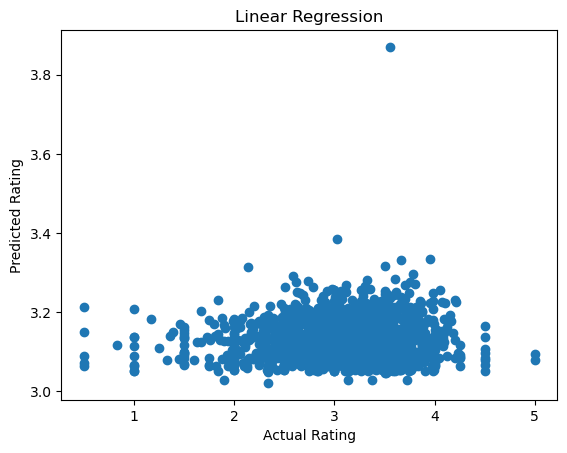

SVM Regression MAE: 0.4722166995335708
SVM Regression R^2: -0.0327126471989263


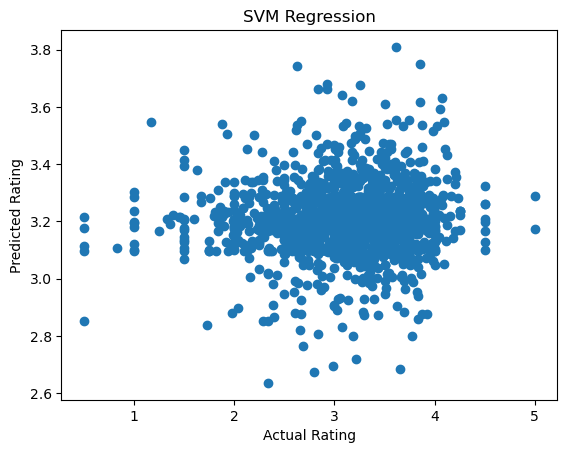

Linear Regression MAE: 0.472
Linear Regression R^2: -0.0
SVM Regression MAE: 0.472
SVM Regression R^2: -0.0327126471989263


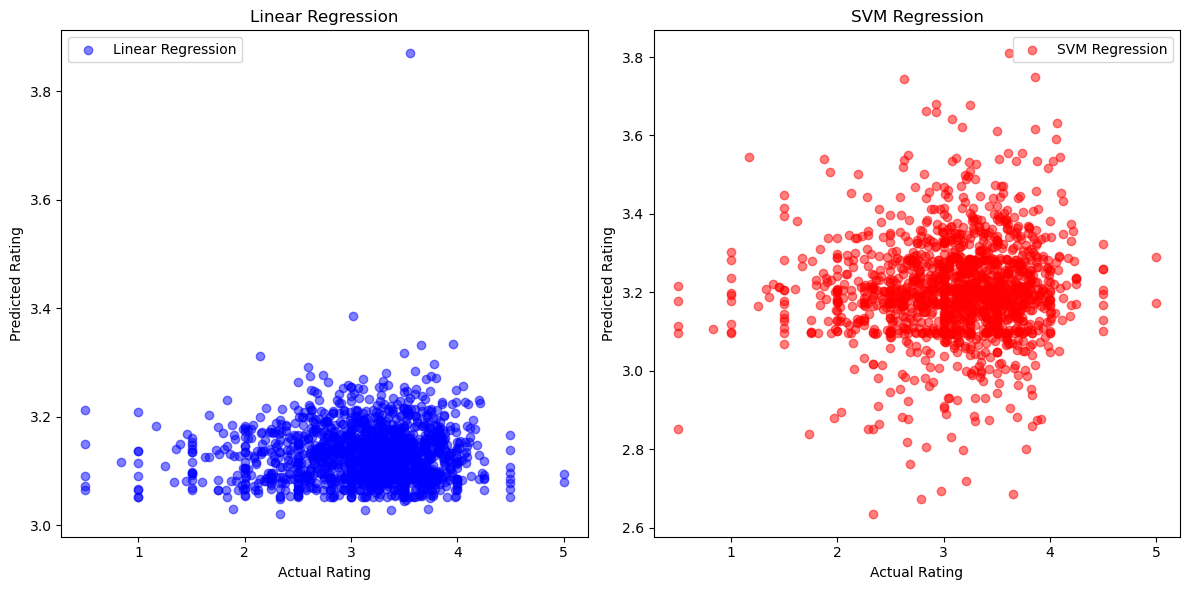

In [106]:
#Running predictions taking out binary and 'runtime' features

# Select numerical features
numerical_features = ['budget', 'revenue', 'popularity']

# Feature Selection
X = merged_df[numerical_features + genre_features]
y = merged_df[ 'mean_rating']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


y_pred_linear = linear_reg.predict(X_test)

# Evaluation
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f'Linear Regression MAE: {mae_linear}')
print(f'Linear Regression R^2: {r2_linear}')

# Plot for Linear Regression
plt.scatter(y_test, y_pred_linear)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Linear Regression')
plt.show()

# SVM Regression
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predict on the test set
y_pred_svr = svr.predict(X_test)

# Evaluation
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f'SVM Regression MAE: {mae_svr}')
print(f'SVM Regression R^2: {r2_svr}')

# Plot for SVM Regression

plt.scatter(y_test, y_pred_svr)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('SVM Regression')

plt.show()

# Round results to 3rd decimal
mae_linear = round(mae_linear, 3)
r2_linear = round(r2_linear, 3)

mae_svr = round(mae_svr, 3)
r2_linear = round(r2_linear, 3)

# Print values of linear and SVM

print(f'Linear Regression MAE: {mae_linear}')
print(f'Linear Regression R^2: {r2_linear}')
print(f'SVM Regression MAE: {mae_svr}')
print(f'SVM Regression R^2: {r2_svr}')


# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Linear Regression
axs[0].scatter(y_test, y_pred_linear, alpha=0.5, label='Linear Regression', color='blue')
axs[0].set_xlabel('Actual Rating')
axs[0].set_ylabel('Predicted Rating')
axs[0].set_title('Linear Regression')
axs[0].legend()

# Plot for SVM Regression
axs[1].scatter(y_test, y_pred_svr, alpha=0.5, label='SVM Regression', color='red')
axs[1].set_xlabel('Actual Rating')
axs[1].set_ylabel('Predicted Rating')
axs[1].set_title('SVM Regression')
axs[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

***Regression anaylsis does not seem to be a viable model for predicting ratings for movies. We now create categories for the mean rating and approach this as a classification task. 

In [116]:
# Analyze summary statistics of mean ratings
mean_rating_stats = merged_df['mean_rating'].describe()
# Compute quartiles
q1 = merged_df['mean_rating'].quantile(0.25)
median = merged_df['mean_rating'].quantile(0.50)
q3 = merged_df['mean_rating'].quantile(0.75)

# Compute potential thresholds based on quartiles
thresholds = [q1, median, q3]

print("Summary Statistics of Mean Ratings:")
print(mean_rating_stats)
print("\nQuartiles:")
print("Q1:", q1)
print("Median:", median)
print("Q3:", q3)



Summary Statistics of Mean Ratings:
count   7554.00
mean       3.13
std        0.62
min        0.50
25%        2.80
50%        3.23
75%        3.55
max        5.00
Name: mean_rating, dtype: float64

Quartiles:
Q1: 2.8
Median: 3.2263027852650494
Q3: 3.553135992623203


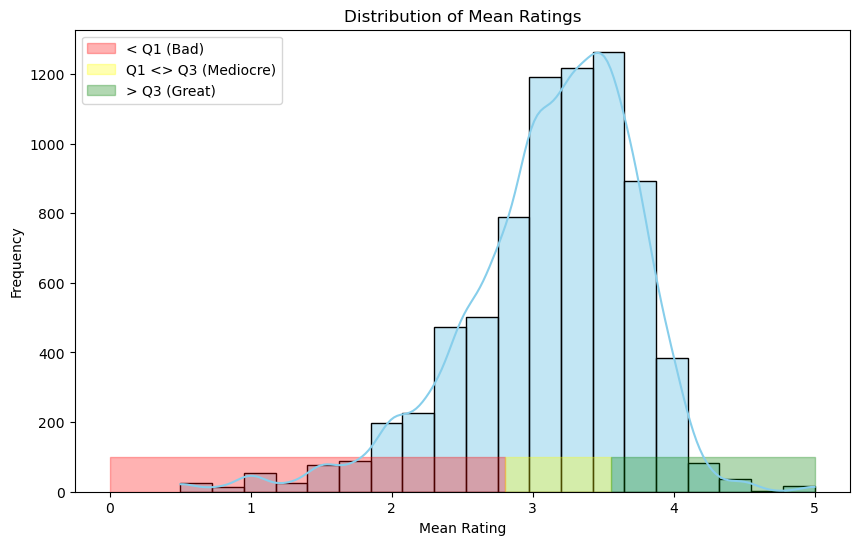

In [160]:
# Visualize the distribution using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['mean_rating'], bins=20, kde=True, color='skyblue')

# Shade the areas
plt.fill_betweenx(np.arange(0, 100), x1=0, x2=q1, color='red', alpha=0.3, label='< Q1 (Bad)')
plt.fill_betweenx(np.arange(0, 100), x1=q1, x2=q3, color='yellow', alpha=0.3, label='Q1 <> Q3 (Mediocre)')
plt.fill_betweenx(np.arange(0, 100), x1=q3, x2=merged_df['mean_rating'].max(), color='green', alpha=0.3, label='> Q3 (Great)')

plt.title('Distribution of Mean Ratings')
plt.xlabel('Mean Rating')
plt.ylabel('Frequency')

# Add the legend for shaded areas
plt.legend(loc='upper left')
plt.show()

In [130]:
# Define rating classes
low_threshold = 2.8
high_threshold = 3.550

# Map mean ratings to classes
merged_df['rating_class'] = pd.cut(merged_df['mean_rating'], bins=[-np.inf, low_threshold, high_threshold, np.inf], labels=['Bad', 'Mediocre', 'Great'])

binary_features = ['belongs_to_collection_binary', 'homepage_binary',
                   'status_In Production', 'status_Post Production', 
                   'status_Released', 'status_Rumored', 'adult', 'video']
numerical_features = ['budget', 'runtime', 'revenue', 'popularity']

# Feature Selection
X = merged_df[numerical_features + binary_features + genre_features]
y = merged_df['rating_class']


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Model Evaluation
accuracy = clf.score(X_test, y_test)
print(f'Accuracy: {accuracy}')


Accuracy: 0.3613500992720053


Classification Report:
               precision    recall  f1-score   support

         Bad       0.24      0.25      0.24       385
       Great       0.24      0.25      0.24       365
    Mediocre       0.51      0.48      0.49       761

    accuracy                           0.37      1511
   macro avg       0.33      0.33      0.33      1511
weighted avg       0.37      0.37      0.37      1511



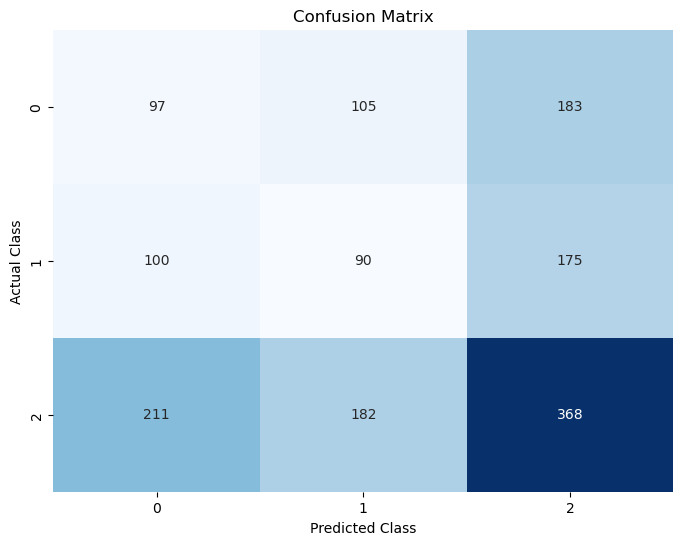

In [129]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


y_pred = clf.predict(X_test)


class_report = classification_report(y_test, y_pred)

print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()


In [132]:
from sklearn.svm import SVC

Accuracy (SVM): 0.5036399735274653


Accuracy (SVM): 0.5016545334215751
Classification Report (SVM):
               precision    recall  f1-score   support

         Bad       0.00      0.00      0.00       385
       Great       0.21      0.01      0.02       365
    Mediocre       0.51      0.99      0.67       761

    accuracy                           0.50      1511
   macro avg       0.24      0.33      0.23      1511
weighted avg       0.31      0.50      0.34      1511



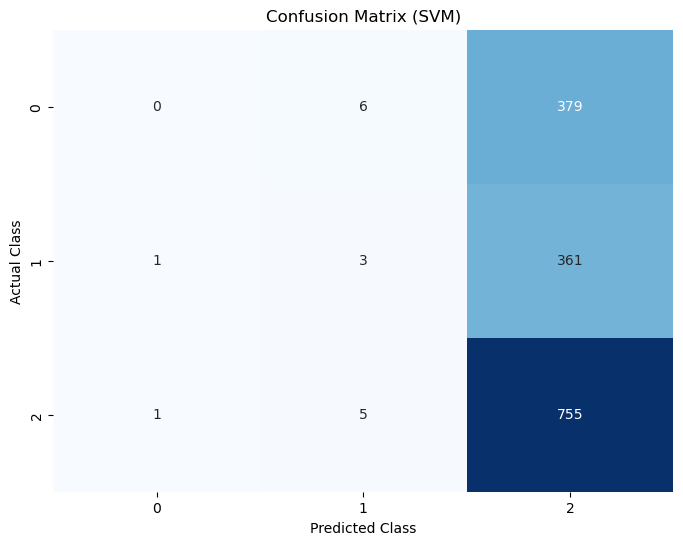

In [163]:
# Create SVM classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Model Evaluation
accuracy_svm = svm_classifier.score(X_test, y_test)
print(f'Accuracy (SVM): {accuracy_svm}')

# Predict classes on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Generate classification report
class_report_svm = classification_report(y_test, y_pred_svm)
print("Classification Report (SVM):\n", class_report_svm)

# Generate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix (SVM)')
plt.show()

In [142]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input



In [152]:
# Map mean ratings to classes
merged_df['rating_class'] = pd.cut(merged_df['mean_rating'], bins=[-np.inf, low_threshold, high_threshold, np.inf], labels=['Bad', 'Mediocre', 'Great'])

binary_features = ['belongs_to_collection_binary', 'homepage_binary',
                   'status_In Production', 'status_Post Production', 
                   'status_Released', 'status_Rumored', 'adult', 'video']
numerical_features = ['budget', 'runtime', 'revenue', 'popularity']

# Feature Selection
X = merged_df[numerical_features + binary_features + genre_features]
y = merged_df['rating_class']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to numerical representations
y_train_numerical = y_train.cat.codes
y_test_numerical = y_test.cat.codes

# Define the Neural Network architecture
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')  # Assuming 3 output classes: Bad, Mediocre, Great
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_numerical, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
accuracy = model.evaluate(X_test, y_test_numerical)[1]
print(f'Accuracy (Neural Network): {accuracy}')


Epoch 1/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3562 - loss: 2054084.8750 - val_accuracy: 0.3242 - val_loss: 602538.4375
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3603 - loss: 921691.0000 - val_accuracy: 0.4516 - val_loss: 352884.3438
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4158 - loss: 428913.6875 - val_accuracy: 0.4888 - val_loss: 70163.4531
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4415 - loss: 190259.6406 - val_accuracy: 0.4938 - val_loss: 1156.0483
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4474 - loss: 47788.4062 - val_accuracy: 0.4921 - val_loss: 1451.1165
Epoch 6/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4673 - loss: 17793.2246 - val_accuracy: 0.4433 - val_loss: 1200.0740
Epoch 7/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4525 - loss: 13323.7354 - val_accuracy: 0.4921 - val_loss: 1.0469
Epoch 8/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/s